In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


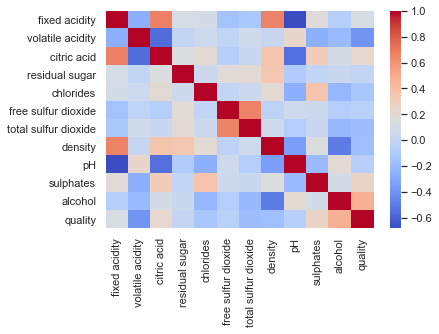

In [3]:
#determining correlation between different variables

sns.heatmap(data.corr(),cmap='coolwarm',cbar=True)

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
x = data.iloc[:,:-1].values#mulitple independent variable
y = data.iloc[:,11].values.reshape(-1,1)   # single dependent variable
x

TypeError: only integer scalar arrays can be converted to a scalar index

In [35]:
x.shape

(1599, 11)

In [7]:
y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

In [8]:
#splitting data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [9]:
#fitting the model 
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()  #creating object of the class LinearRegression
reg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Saving the model in pickle file 

In [10]:
pickle.dump(reg_model,open('regression_model.pkl','wb'))

In [11]:
reg_model.coef_

array([[ 2.26672740e-02, -1.20925090e+00, -1.56071111e-01,
         2.24812025e-02, -1.83856252e+00,  2.65152304e-03,
        -2.89528187e-03, -1.98023975e+01, -3.83857411e-01,
         8.55722787e-01,  2.66919946e-01]])

In [12]:
reg_model.intercept_

array([24.00118149])

In [13]:
X_test.shape

(400, 11)

In [14]:
prediction = reg_model.predict(X_test)

In [15]:
prediction

array([[5.77335196],
       [5.03615149],
       [6.57566313],
       [5.35700313],
       [5.91383789],
       [5.03736175],
       [5.39845825],
       [6.0205325 ],
       [4.84470033],
       [4.96377752],
       [5.31578704],
       [5.4328033 ],
       [5.72093212],
       [5.06318245],
       [5.53377735],
       [6.36957899],
       [6.78850337],
       [5.7755736 ],
       [5.94557484],
       [5.09751407],
       [6.30781709],
       [5.18258948],
       [5.64391993],
       [6.13206845],
       [5.50536664],
       [5.03379161],
       [5.19100506],
       [6.48646495],
       [5.35086453],
       [6.23648567],
       [6.06101651],
       [5.84578611],
       [5.56795505],
       [5.27877839],
       [5.72323541],
       [6.17053915],
       [5.15162762],
       [5.4592767 ],
       [6.36154344],
       [5.79027666],
       [5.45018097],
       [6.04540865],
       [6.6570408 ],
       [6.55076451],
       [5.99011519],
       [4.79867523],
       [5.51492895],
       [6.017

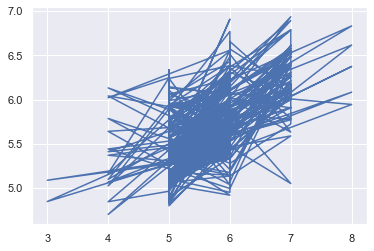

In [16]:
plt.plot(y_test,prediction)
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,prediction)

0.4000725270850554

In [18]:
r2_score(y_test,prediction)

0.34542438124562735

In [19]:
mean_squared_error(y_test,prediction)**(1/2)

0.6325128671300335

In [20]:
data.shape

(1599, 12)

In [31]:
prediction = reg_model.predict(np.array([[1,2,3,4,5,6,7,8,9,10,11]]).reshape(1,-1))

In [32]:
output = prediction[0]

In [33]:
round(float(output),2)

-138.35